# K-Means

The code written isn't going to be optimized, as it isn't the goal of this notebook. The purpose of this notebook is to present to you an intuitive and easy way to understand how K-means, a simple clustering algorithms, works. 

Clustering algorithms are used to group points into same clusters. When we have many different attributes, it is extremely difficult to visualize what points are in the same cluster. Clustering is extremely useful, as it gives us an idea of which points are close together.

Clustering is used for Unsupervised Learning (if we already have the target values, we already have the clusters).

For this example, we will work with a two dimensional cluster. We will extract some points from the iris dataset, and then dive right into the algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

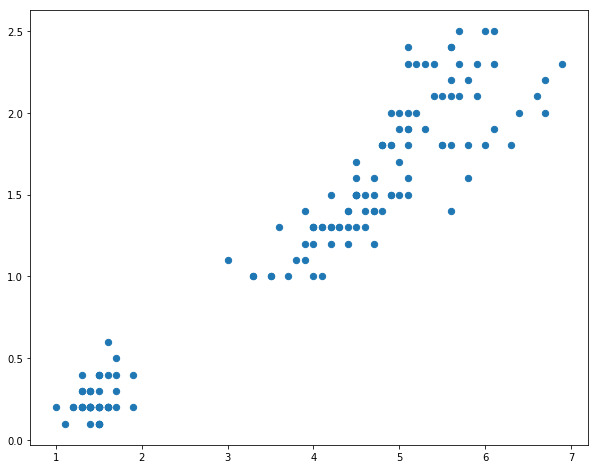

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
X = np.array(iris.data[:, 2:])

fig, ax = plt.subplots(figsize = [10,8])
plt.scatter(X[:, 0], X[:, 1], s = 40);

The Iris dataset is very well known. It has been studied countless of times, and is, alongside the MNIST dataset, the most common test sets. For more information, please read
https://en.wikipedia.org/wiki/Iris_flower_data_set

K-means is an algorithm that consists of three steps:
The first step is to randomly K centroids.
The second is to identify what points are closest to what centroid
The third is to update the centroids position by taking the average x and y values for that centroid.

The second and third step are repeating, and we will go through the math. For now, let's do step 1. We will need to randomly create centroids. Instead of randomly assigning a point in the graph, we will randomly select k points from our data, and set those as our initial centroids.

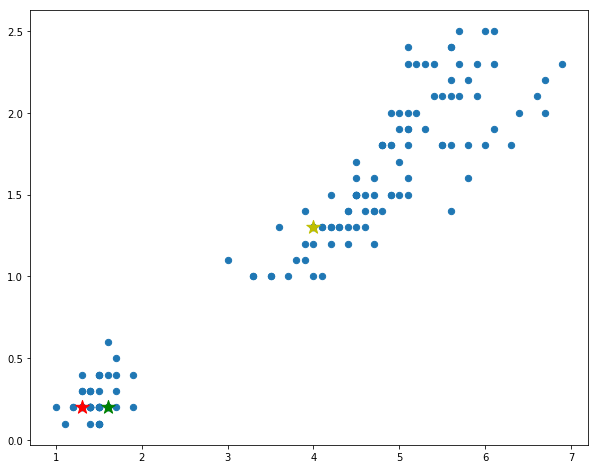

In [17]:
# Number of clusters
k = 3
# X coordinates of random centroids
C = np.empty((3,2))
for q in range(k):
    random =np.random.randint(X.shape[0])
    C[q,:] = X[random,:]

#Store the initial centroids in a separate array
initC = C.copy()

fig, ax = plt.subplots(figsize = [10,8])
plt.scatter(X[:, 0], X[:, 1], s = 40);
plt.scatter(C[0,0],C[0,1], marker='*', s=200, c='r');
plt.scatter(C[1,0],C[1,1], marker='*', s=200, c='y');
plt.scatter(C[2,0],C[2,1], marker='*', s=200, c='g');

Now that we have our centroids created, we need to color our other points with the closest centroid's color. For this, we will have to calculate the distance of each point with the centroid.

Recall that the distance of two points is given by:

$$dist(A,B) = \sqrt{(A_x-B_x)^2+(A_y-B_y)^2} $$

In [18]:
def distance(X,centroid):
    #Creating Ax
    smallx = X[0]
    smally = X[1]
    dist = []
    for n in range(centroid.shape[0]):
        #Creating Bx
        centX = centroid[n,0]
        centY = centroid[n,1]
        
        #Calculating Distnace
        disty = np.sqrt((smallx-centX)**2 + (smally-centY)**2)
        dist.append(disty)
    #Taking the position of the minumum
    return np.argmin(dist)

Now that we created our distances, let's color each point with their respective centroid's color.

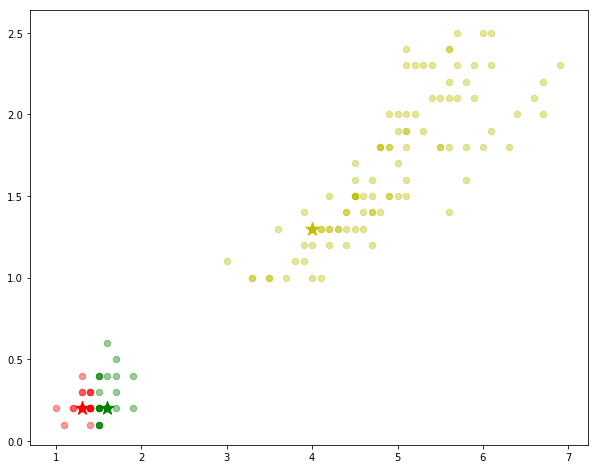

In [19]:
colors = ['r', 'y', 'g']
fig, ax = plt.subplots(figsize = [10,8])
#Keeping the closest centroid in an array (we will use this later)
pointcent = []
for n in range(X.shape[0]):
        i = distance(X[n,:], C)
        pointcent.append(i)
        ax.scatter(X[n, 0], X[n, 1], s=40,alpha=0.4, c=colors[i])


plt.scatter(C[0,0],C[0,1], marker='*', s=200, c='r');
plt.scatter(C[1,0],C[1,1], marker='*', s=200, c='y');
plt.scatter(C[2,0],C[2,1], marker='*', s=200, c='g');

We are almost there! Now we just need to calculate the new centroids. We can use our pointcent array to slice our X array, and use that to calculate the new centroid.

In [20]:
#For Visualization purposes, we will create oldC and newC to track the change
oldC = C.copy()
for m in range(k):
    indexing = np.array(pointcent)
    C[m,:] = np.mean(X[indexing == m, :], axis = 0)

Let's plot it.

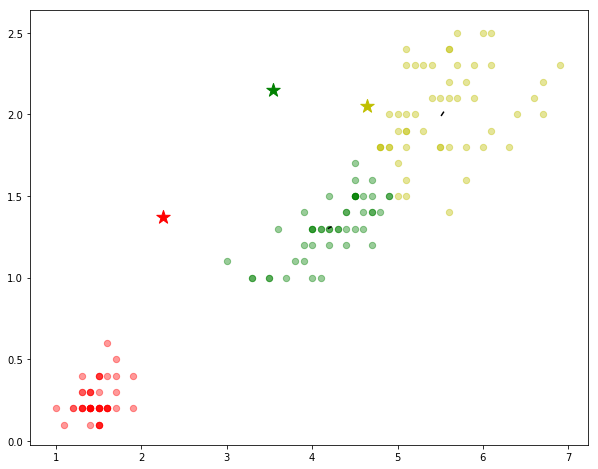

In [24]:
colors = ['r', 'y', 'g']
fig, ax = plt.subplots(figsize = [10,8])
#Keeping the closest centroid in an array (we will use this later)
for n in range(X.shape[0]):
        ax.scatter(X[n, 0], X[n, 1], s=40, alpha=0.4, c=colors[pointcent[n]])

plt.scatter(initC[0,0],initC[0,1], marker='*', s=200, c='r');
plt.scatter(initC[1,0],initC[1,1], marker='*', s=200, c='y');
plt.scatter(initC[2,0],initC[2,1], marker='*', s=200, c='g');

#Keeping track of the centroid
plt.plot([oldC[0,0],C[0,0]],[oldC[0,1],C[0,1]],c='k');
plt.plot([oldC[1,0],C[1,0]],[oldC[1,1],C[1,1]],c='k');
plt.plot([oldC[2,0],C[2,0]],[oldC[2,1],C[2,1]],c='k');

We are now done with our algorithm! We created step1, step2 and step3. We just need to compile everything, adding the amount of loops we want to iterate through.

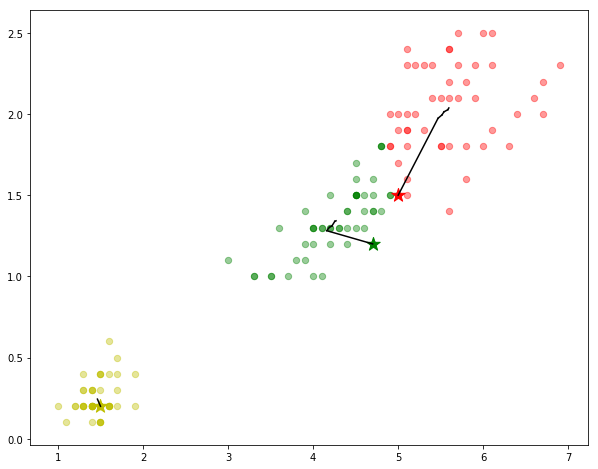

In [47]:
#Distance function
def distance(X,centroid):
    #Creating Ax
    smallx = X[0]
    smally = X[1]
    dist = []
    for n in range(centroid.shape[0]):
        #Creating Bx
        centX = centroid[n,0]
        centY = centroid[n,1]
        
        #Calculating Distnace
        disty = np.sqrt((smallx-centX)**2 + (smally-centY)**2)
        dist.append(disty)
    #Taking the position of the minumum
    return np.argmin(dist)


#Step 1: Create K number of centroids
# Number of clusters
k = 3

# X coordinates of random centroids
C = np.empty((3,2))
for q in range(k):
    random =np.random.randint(X.shape[0])
    C[q,:] = X[random,:]

#Store the initial centroids in a separate array
initC = C.copy()

#Start iteration
it = 5
fig, ax = plt.subplots(figsize = [10,8])
for  _ in range(it):
    
    #Step 2: Calculate distance, store minium value in pointcent.
    pointcent = []
    for n in range(X.shape[0]):
        i = distance(X[n,:], C)
        pointcent.append(i)
    
    #Step 3: Update centroid's position
    oldC = C.copy()
    for m in range(k):
        indexing = np.array(pointcent)
        C[m,:] = np.mean(X[indexing == m, :], axis = 0)
    #Optional: Plot the centroid's movements
    for centr in range(k):
        plt.plot([oldC[centr,0],C[centr,0]],[oldC[centr,1],C[centr,1]],c='k');
    
#Plot the end result
for n in range(X.shape[0]):
        ax.scatter(X[n, 0], X[n, 1], s=40, alpha=0.4, c=colors[pointcent[n]])

#Plot initial centroid position
plt.scatter(initC[0,0],initC[0,1], marker='*', s=200, c='r');
plt.scatter(initC[1,0],initC[1,1], marker='*', s=200, c='y');
plt.scatter(initC[2,0],initC[2,1], marker='*', s=200, c='g');

Note: In some iterations, we will get a cluster that will take over the entire map, or even two clusters that should just be considered as one cluster. This is because, when we randomly select the points, the algorithm can converge towards a local minima, which causes these behaviors.

And we are done with our first K-means algorithm! Great work! We were able to create a K-means algorithm

This is the basic clustering algorithms. This algorithm is basic, and has more apparent limitations. We can expand this to multiple variables, select more clusters and  add a cost function if we know the labels. If you still have some doubts, please ask! I am looking forward to clarifying your doubts! 


You've accomplished a milestone in your quest towards learning Machine Learning! Isn't it fascinating how, with little algebra, code and logic, we were able to produce such a useful and powerful tool? I believe that you can push yourself even further! I challenge you to optimize these lines of code, to get a faster output from the computer! There's so much you can improve this simple algorithm! It's a great exercise to start thinking about linear algebra and even other functions that exists in Python. Thank you very much for following! I wish you the best in your quest towards becoming Machine Learning Expert!.